# GloFAS historical

In [4]:
import climetlab as cml
import xarray as xr
from climetlab_cems_flood.utils import get_po_basin

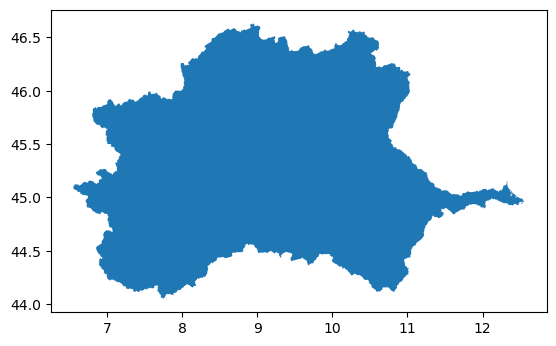

In [6]:
gdf = get_po_basin()
gdf_diss = gdf.dissolve()
gdf_diss.plot()
minx, miny, maxx, maxy = gdf.unary_union.bounds
po = {'name':'po', 'area':[maxy, minx,miny, maxx] }

In [8]:
hist = cml.load_dataset(
            'cems-glofas-historical',
            model='lisflood',
            product_type='consolidated',
            system_version='version_3_1',
            temporal_filter= '2020-2021 05-09 *',
            variable="river_discharge_in_the_last_24_hours",
            area = [po]
            split_on = [('hyear', 1)],
            threads = 12
        )

In [8]:
hist.to_xarray()